# Home Risk Data Preprocessing and Feature Selection


In [1]:
# import needed libraries 

import pandas as pd

import glob
import os 

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline
import seaborn as sns

from IPython.display import Image



## Let's print out file structure


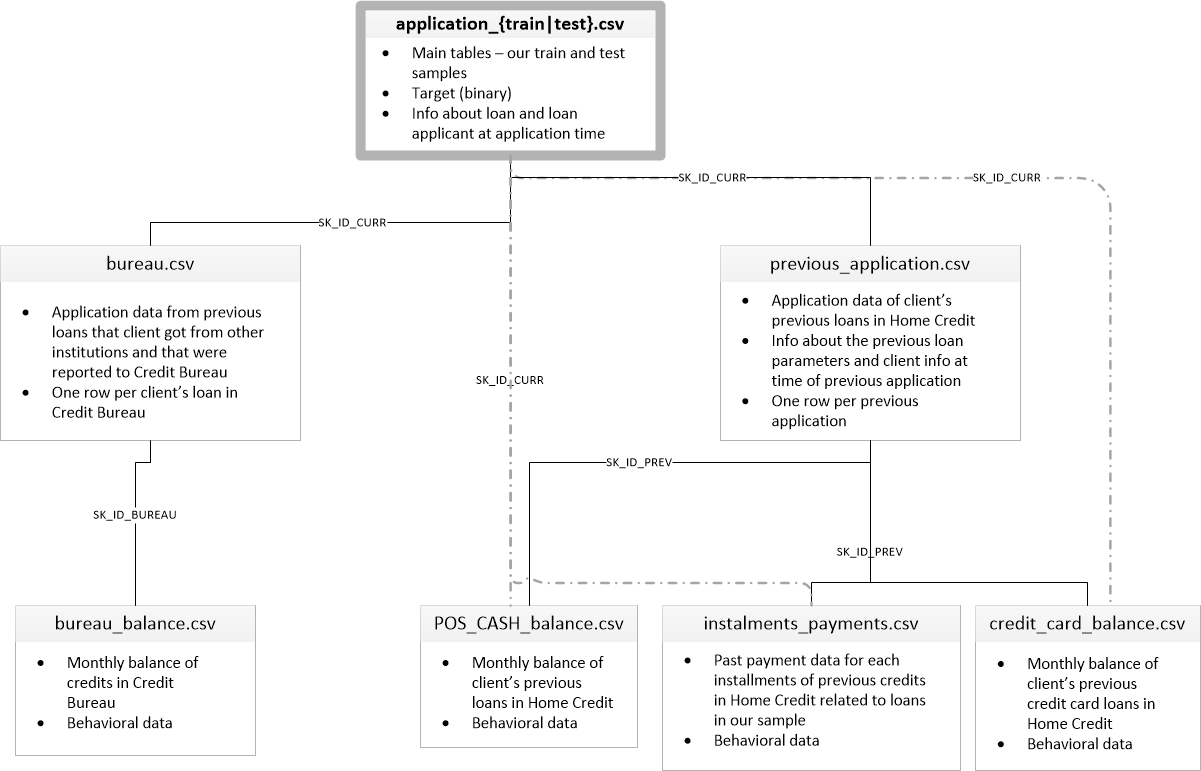

In [3]:
Image(filename='home_credit.png') 


## get base files location

In [4]:
basename = os.getcwd() + "/home-credit-default-risk"
names = [os.path.basename(x) for x in glob.glob(basename + "/*")]
print(names)

['application_train.csv']


## read all files as dataframe

In [6]:
application_test = pd.read_csv(basename + "/application_test.csv")
application_train = pd.read_csv(basename + "/application_train.csv")
bureau = pd.read_csv(basename + "/bureau.csv")
bureau_balance = pd.read_csv(basename + "/bureau_balance.csv")
credit_card_balance = pd.read_csv(basename + "/credit_card_balance.csv")
homecredit_columns_description = pd.read_csv(basename + "/HomeCredit_columns_description.csv", encoding='cp1252')
installments_payments = pd.read_csv(basename + "/installments_payments.csv")
pos_cash_balance = pd.read_csv(basename + "/POS_CASH_balance.csv")
previous_application = pd.read_csv(basename + "/previous_application.csv")
sample_submission = pd.read_csv(basename + "/sample_submission.csv")

## take look at the test file

In [7]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
application_test.shape

(48744, 121)

## take a look at the training file

In [9]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [10]:
application_train.shape

(307511, 122)

In [11]:
application_train
application_train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

C:\Users\omer_\AppData\Local\Temp/ipykernel_25700/3609102376.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  application_train.info(verbose=True, null_counts=True)


## get information about null values in testing dataframe

In [12]:
application_test.isna().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

## split target column

In [14]:
target=application_train.TARGET
test_id = application_test[['SK_ID_CURR']].copy()

## drop id column and target

In [15]:
train=application_train.drop(columns=['SK_ID_CURR', 'TARGET'])
test=application_test.drop(columns='SK_ID_CURR')

## convert all columns to float data type

In [16]:
cols=application_train.columns
test_cols=application_test.columns

for i in train.columns:
    le = LabelEncoder()
    application_train[i]=le.fit_transform(application_train[i])

for i in test.columns:
    le = LabelEncoder()
    application_test[i]=le.fit_transform(application_test[i])   

## fill null data values

In [17]:
transformer = SimpleImputer(strategy='median')
application_train=transformer.fit_transform(application_train)

transformer = SimpleImputer(strategy='median')
application_test=transformer.fit_transform(application_test)

In [18]:
train_data = pd.DataFrame(application_train, columns=cols)
test_data = pd.DataFrame(application_test, columns=test_cols)

## transformed data frame

In [19]:
train_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002.0,1.0,0.0,1.0,0.0,1.0,0.0,1754.0,1191.0,4588.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003.0,0.0,0.0,0.0,0.0,0.0,0.0,2064.0,4338.0,6985.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,0.0,1.0,1.0,1.0,1.0,0.0,338.0,228.0,662.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0.0,0.0,0.0,0.0,1.0,0.0,1170.0,836.0,5680.0,...,0.0,0.0,0.0,0.0,5.0,9.0,9.0,24.0,11.0,25.0
4,100007.0,0.0,0.0,1.0,0.0,1.0,0.0,1019.0,1635.0,3960.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251.0,0.0,0.0,1.0,0.0,0.0,0.0,1407.0,612.0,5217.0,...,0.0,0.0,0.0,0.0,5.0,9.0,9.0,24.0,11.0,25.0
307507,456252.0,0.0,0.0,0.0,0.0,1.0,0.0,387.0,672.0,1792.0,...,0.0,0.0,0.0,0.0,5.0,9.0,9.0,24.0,11.0,25.0
307508,456253.0,0.0,0.0,0.0,0.0,1.0,0.0,1371.0,2270.0,5744.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254.0,1.0,0.0,0.0,0.0,1.0,0.0,1519.0,1049.0,3593.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## normalize data values to investigate easyly

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for col in train_data.columns:
    train_data[[col]] = scaler.fit_transform(train_data[[col]])

for col in test_data.columns:
    test_data[[col]] = scaler.fit_transform(test_data[[col]])

# Feature Selection

## Top 10 feature that positively correlated with TARGET

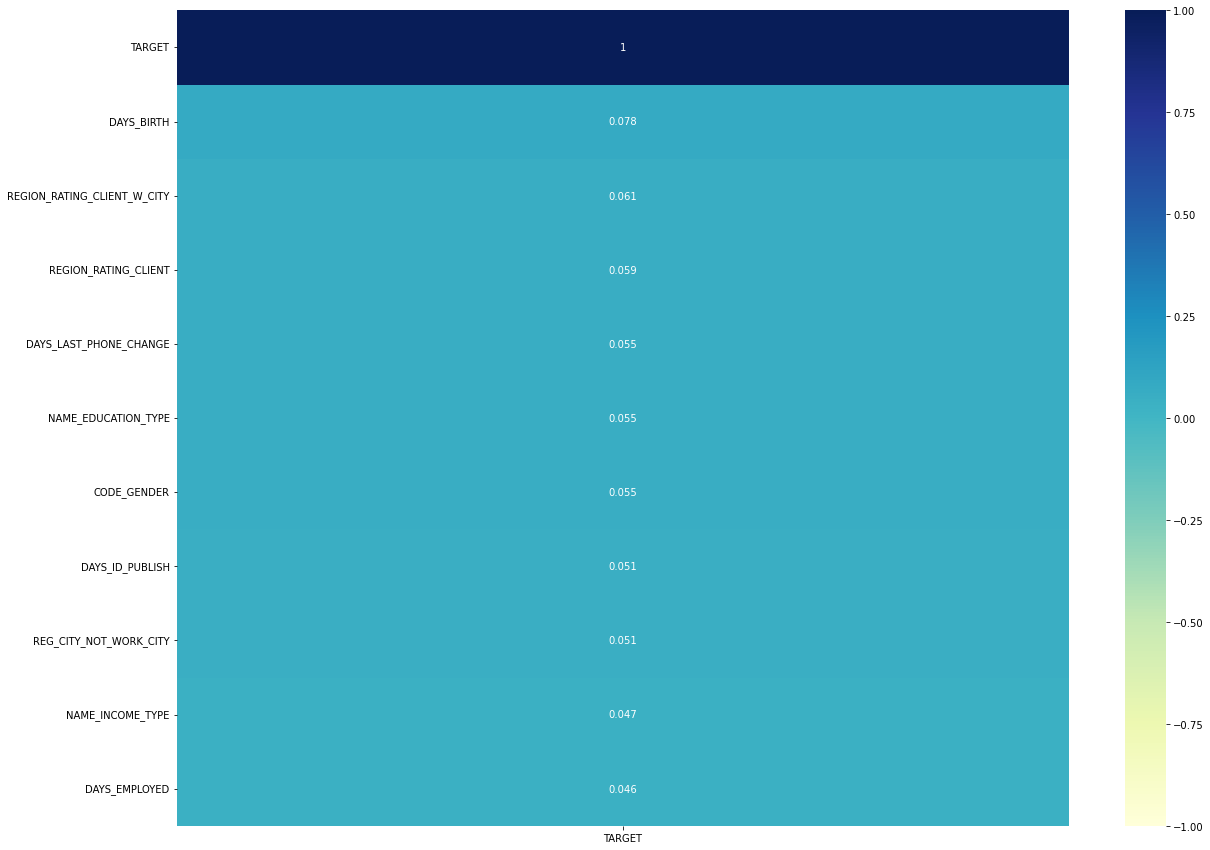

In [21]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(train_data.corr()[["TARGET"]].sort_values("TARGET").tail(11),vmax=1, vmin=-1, cmap="YlGnBu", annot=True, ax=ax)
ax.invert_yaxis()

## Top 10 feature that negatively correlated with TARGET

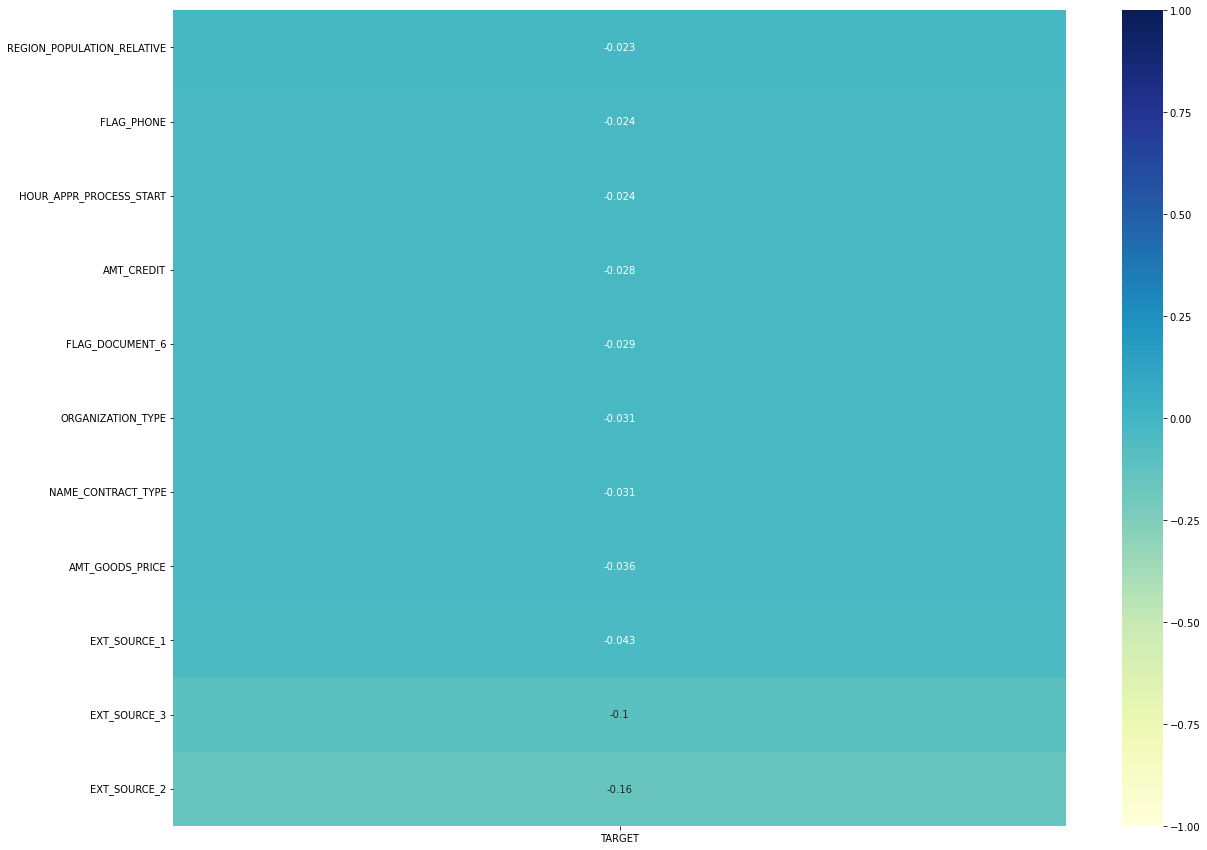

In [22]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(train_data.corr()[["TARGET"]].sort_values("TARGET").head(11),vmax=1, vmin=-1, cmap="YlGnBu", annot=True, ax=ax)
ax.invert_yaxis()

## Result

In [23]:
# get corr column names 
negative_corr = train_data.corr()[["TARGET"]].sort_values("TARGET").head(10)
positive_corr = train_data.corr()[["TARGET"]].sort_values("TARGET").tail(11)

In [24]:
#rename column names
negative_corr = negative_corr.reset_index(level=0)
negative_corr.columns = ["table_name","Negative"]

positive_corr = positive_corr.reset_index(level=0)
positive_corr.columns = ["table_name","Positive"]

In [25]:
negative_corr

,table_name,Negative
0,EXT_SOURCE_2,-0.155511
1,EXT_SOURCE_3,-0.102304
2,EXT_SOURCE_1,-0.043422
3,AMT_GOODS_PRICE,-0.036016
4,NAME_CONTRACT_TYPE,-0.030896
5,ORGANIZATION_TYPE,-0.030765
6,FLAG_DOCUMENT_6,-0.028602
7,AMT_CREDIT,-0.028259
8,HOUR_APPR_PROCESS_START,-0.024166
9,FLAG_PHONE,-0.023806


In [26]:
corrl = pd.DataFrame()

corrl["neg_table_name"] = negative_corr["table_name"]
corrl["Negative"] = negative_corr["Negative"]

corrl["pos_table_name"] = positive_corr["table_name"]
corrl["Positive"] = positive_corr["Positive"]

corrl

,neg_table_name,Negative,pos_table_name,Positive
0,EXT_SOURCE_2,-0.155511,DAYS_EMPLOYED,0.046114
1,EXT_SOURCE_3,-0.102304,NAME_INCOME_TYPE,0.046829
2,EXT_SOURCE_1,-0.043422,REG_CITY_NOT_WORK_CITY,0.050994
3,AMT_GOODS_PRICE,-0.036016,DAYS_ID_PUBLISH,0.051456
4,NAME_CONTRACT_TYPE,-0.030896,CODE_GENDER,0.054692
5,ORGANIZATION_TYPE,-0.030765,NAME_EDUCATION_TYPE,0.054699
6,FLAG_DOCUMENT_6,-0.028602,DAYS_LAST_PHONE_CHANGE,0.055226
7,AMT_CREDIT,-0.028259,REGION_RATING_CLIENT,0.058899
8,HOUR_APPR_PROCESS_START,-0.024166,REGION_RATING_CLIENT_W_CITY,0.060893
9,FLAG_PHONE,-0.023806,DAYS_BIRTH,0.078240


As we can see , if number going further away from 0, column is getting correlated with TARGET columns in a positive or negative way. As a result, top 10 correlated columns are:

EXT_SOURCE_2
EXT_SOURCE_3
DAYS_BIRTH
REGION_RATING_CLIENT_W_CITY
REGION_RATING_CLIENT
DAYS_LAST_PHONE_CHANGE
NAME_EDUCATION_TYPE
CODE_GENDER
DAYS_ID_PUBLISH
REG_CITY_NOT_WORK_CITY